In [1]:
# minimal imports
import pandas as pd
# from plotnine.scales.scale_color import scale_color_cmap, scale_color_cmap_d
import geopandas as gp
import numpy as np
from plotnine import *
import plotnine as p9

# for graphical enhancement
from mizani.formatters import date_format, percent_format, dollar_format, comma_format
from adjustText import adjust_text  # pip install adjustText
from matplotlib import rcParams

# In most cases, you may not import them.
# you may need them If only you are adhere to color determination...
from matplotlib.pylab import cm
from matplotlib.colors import rgb2hex

# Needed by smoothing and modeling
# pip install scikit-misc
from statsmodels.formula.api import ols, glm
from statsmodels.gam.smooth_basis import BSplines
import statsmodels.api as sm

# dataset packages
from pysocviz.reader import load_dataset
from pysocviz.properties import colors
from gapminder import gapminder

gss_sm = load_dataset('gss_sm')
election = load_dataset('election')
organdata = load_dataset('organdata')
elections_historic = load_dataset('elections_historic')
asasec = load_dataset('asasec')
titanic = load_dataset('titanic')
oecd_sum = load_dataset('oecd_sum')
county_data = load_dataset('county_data')
gss_lon = load_dataset('gss_lon')
fredts = load_dataset('fredts')
yahoo = load_dataset('yahoo')
studebt = load_dataset('studebt')
bad_date = load_dataset('bad_date')
# notebook 上のサイズは以下で設定可
# TODO: 他のデバイスでは?
p9.options.figure_size = (10, 10)
# フォントファミリ名は適宜変更
# TODO: imitate hrbrthemes
theme_set(theme_minimal(base_family='Noto Sans CJK JP'))

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.


In [2]:
# --- Appendix ---

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/geoms/geom_path.py:81: PlotnineWarning: geom_path: Each group consist of only one observation. Do you need to adjust the group aesthetic?


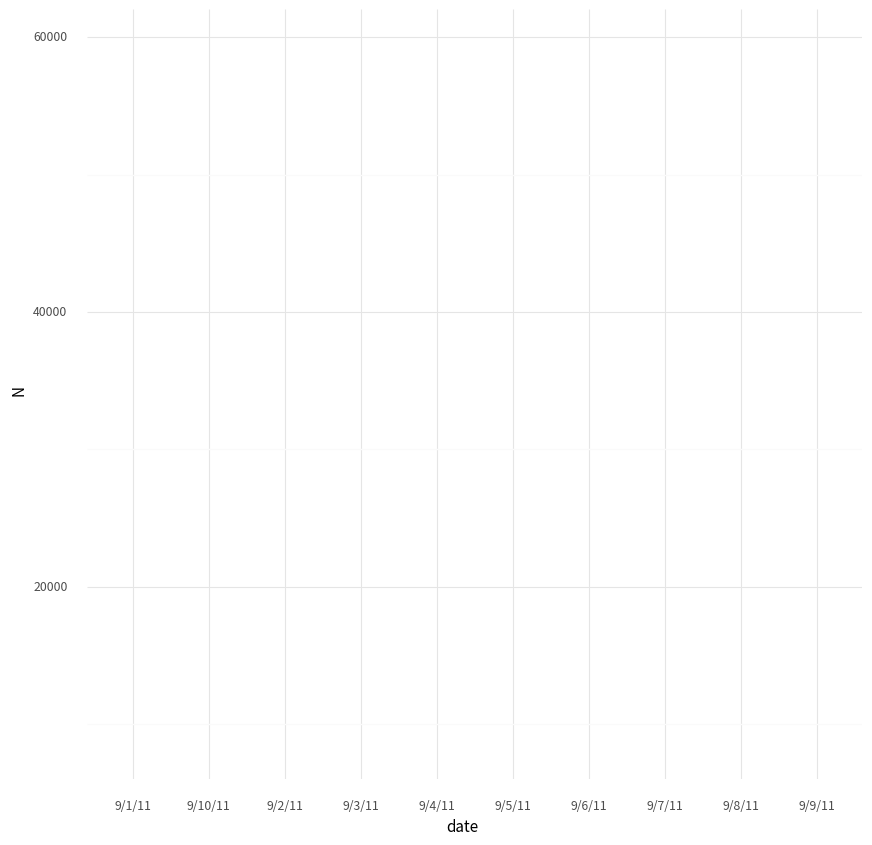

<ggplot: (8745912412817)>

In [3]:
# Fig. A.3
p = ggplot(bad_date, aes(x='date', y='N'))
p + geom_line()

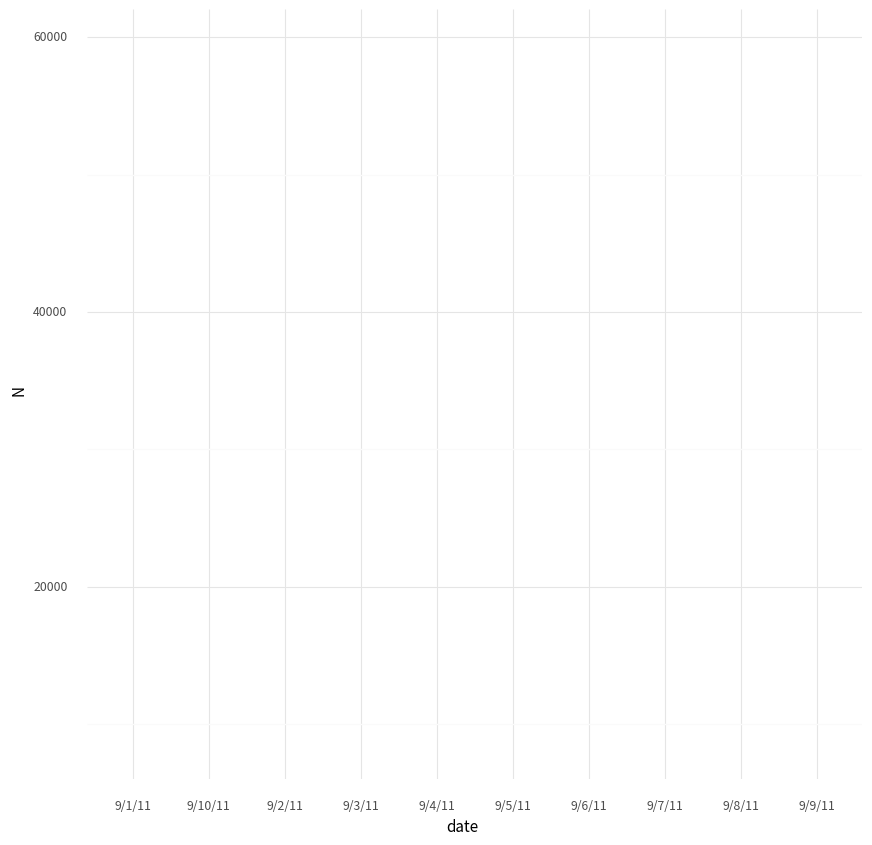

<ggplot: (8745912412787)>

In [4]:
# Fig. A.4
bad_date2 = pd.concat([bad_date, bad_date])

p = ggplot(bad_date2, aes(x='date', y='N'))
p + geom_line()

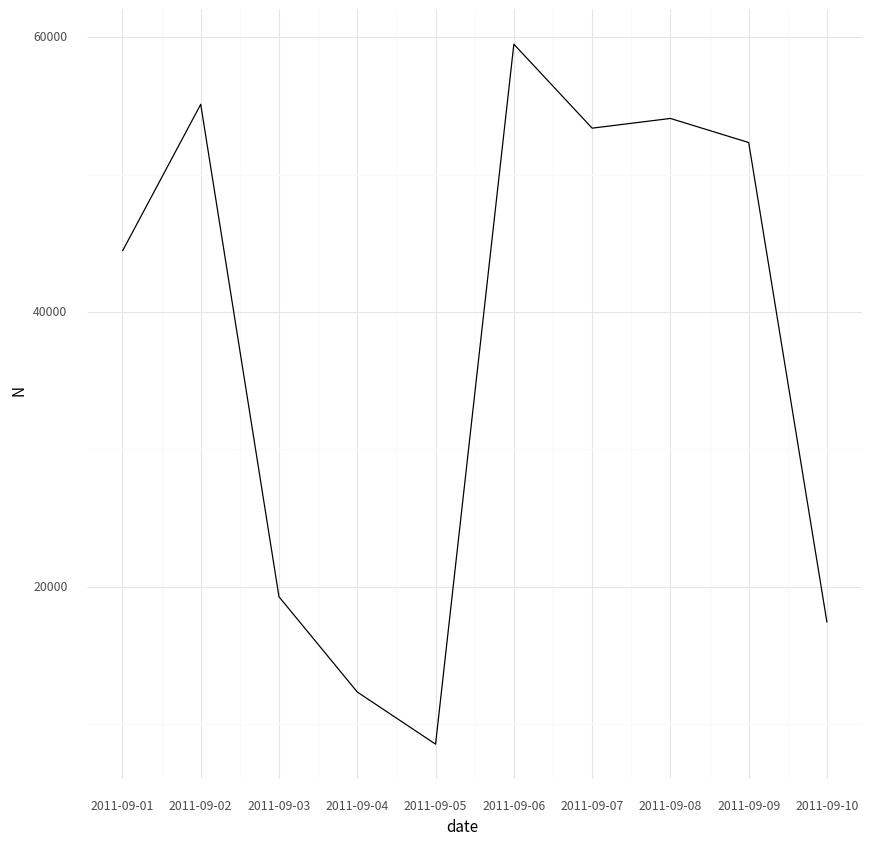

<ggplot: (8745912425572)>

In [5]:
# Fig. A.5
# Of course, lubridate cannot available in Python.
# You can directly transform the type of `date` column by pandas.
p = ggplot(
  bad_date.assign(date=lambda d: d['date'].astype('datetime64[ns]')),
  aes(x='date', y='N'))
p + geom_line()

/home/ks/.pyenv/versions/3.9.5/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 34 rows containing missing values.


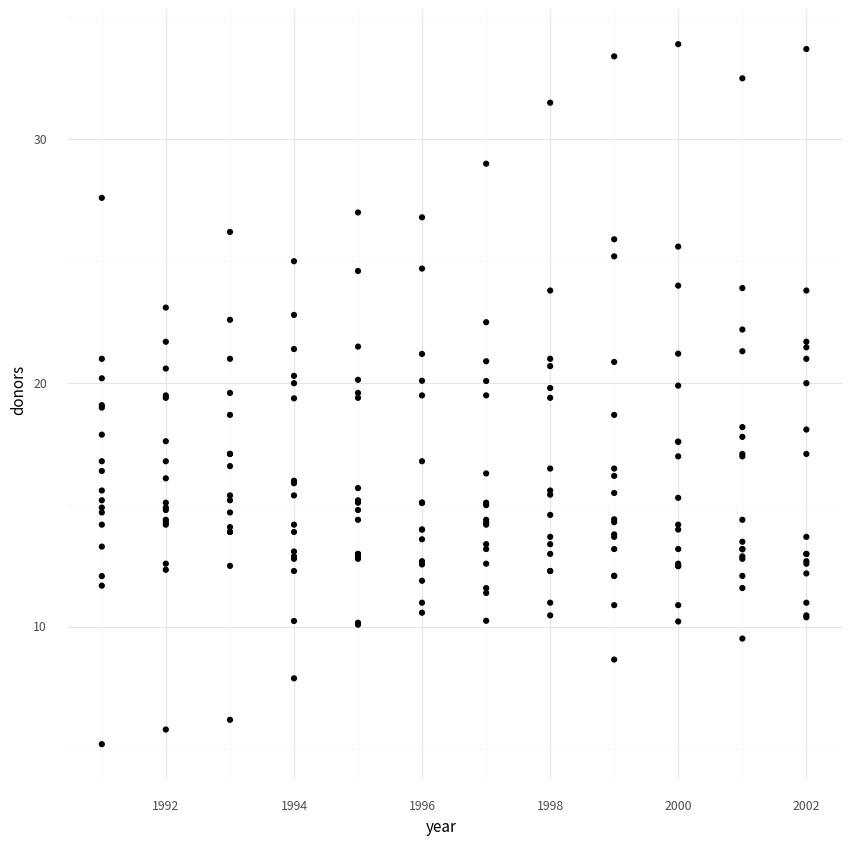

<ggplot: (8745783183216)>

In [6]:
# Fig. A.6
url = "https://cdn.rawgit.com/kjhealy/viz-organdata/master/organdonation.csv"
bad_year = pd.read_csv(url)
bad_year[lambda d: d.columns[:3]].head(n=10)

p = ggplot(bad_year, aes(x='year', y='donors'))
p + geom_point()
# Improvements for plotnine has some options.
# option 1: change of label format.
p = ggplot(bad_year, aes(x='year', y='donors'))
p + geom_point() + scale_x_continuous(labels=lambda x: x.astype(int))
# Option 2: parse `year` column as date and then specify the x-axis scale format
ggplot(
  bad_year.assign(year=lambda d: pd.to_datetime(d['year'], format='%Y')),
  aes(x='year', y='donors')
) + geom_point() + scale_x_datetime(date_labels='%Y')

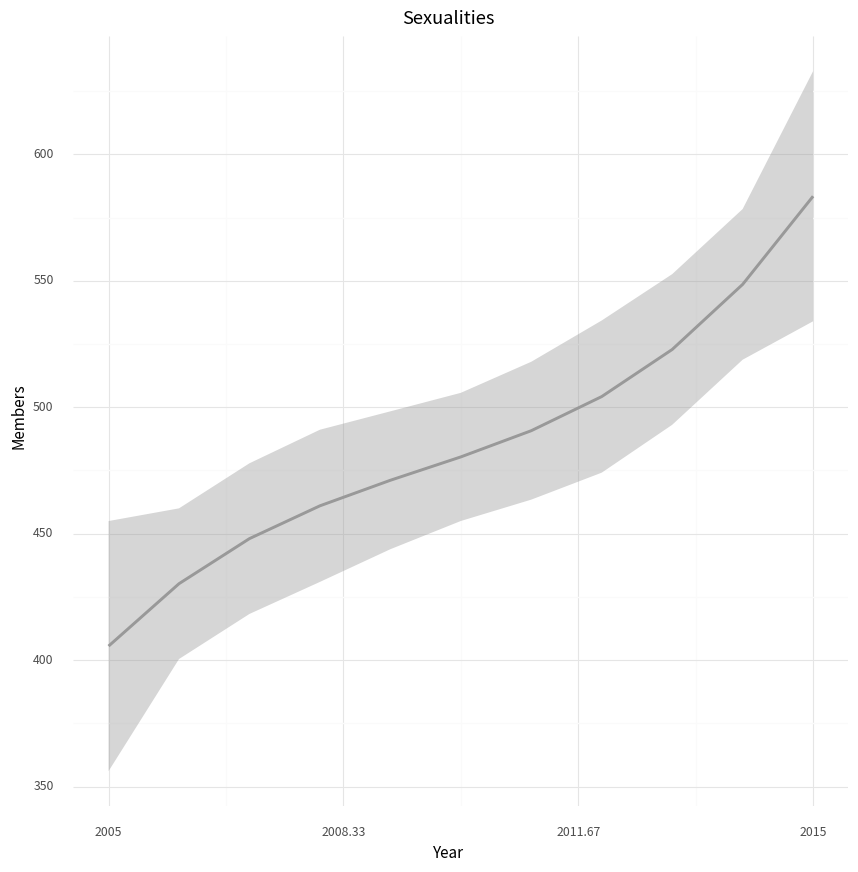

<ggplot: (8745783166690)>

In [7]:
# Fig. A.7
# TODO: natural splines in statsmodels
def plot_section(
  section="Culture", x="Year", y="Members", data=asasec, smooth=False
  ):
  p = ggplot(data.loc[lambda d: d['Sname']==section], aes(x=x, y=y))
  if smooth:
    p0 = p + geom_smooth(
      color="#999999", size=1.2, method='lm', formula='y ~ bs(x, 3)'
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  else:
    p0 = p + geom_line(color="#E69F00", size=1.2
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  return p0
plot_section("Rationality")
plot_section("Sexualities", smooth=True)

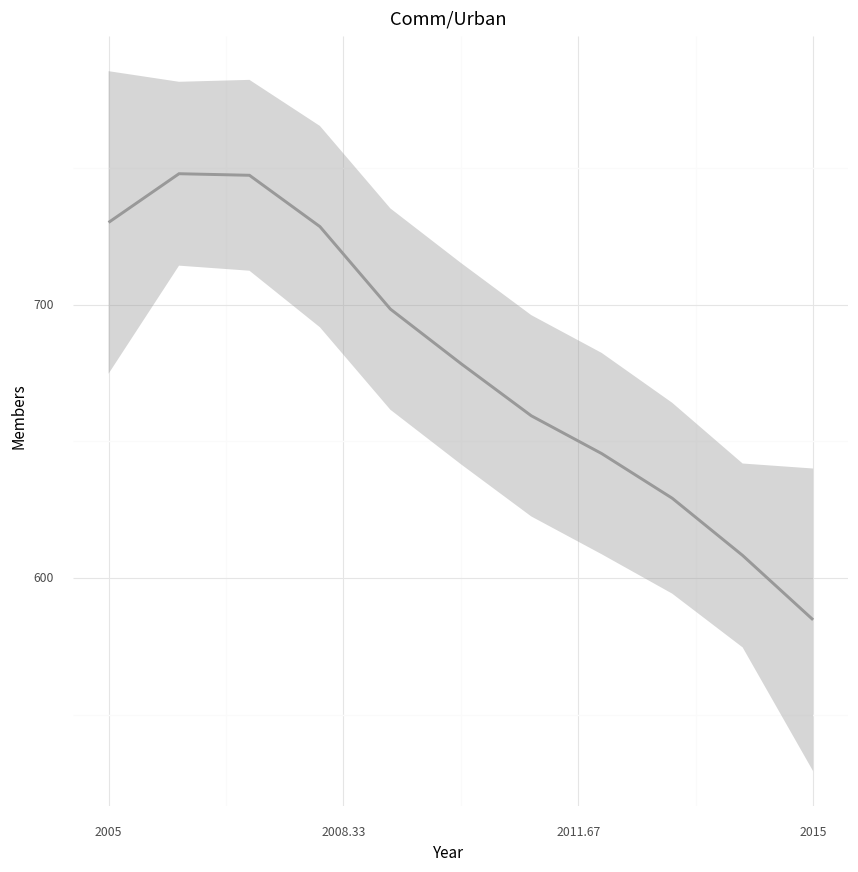

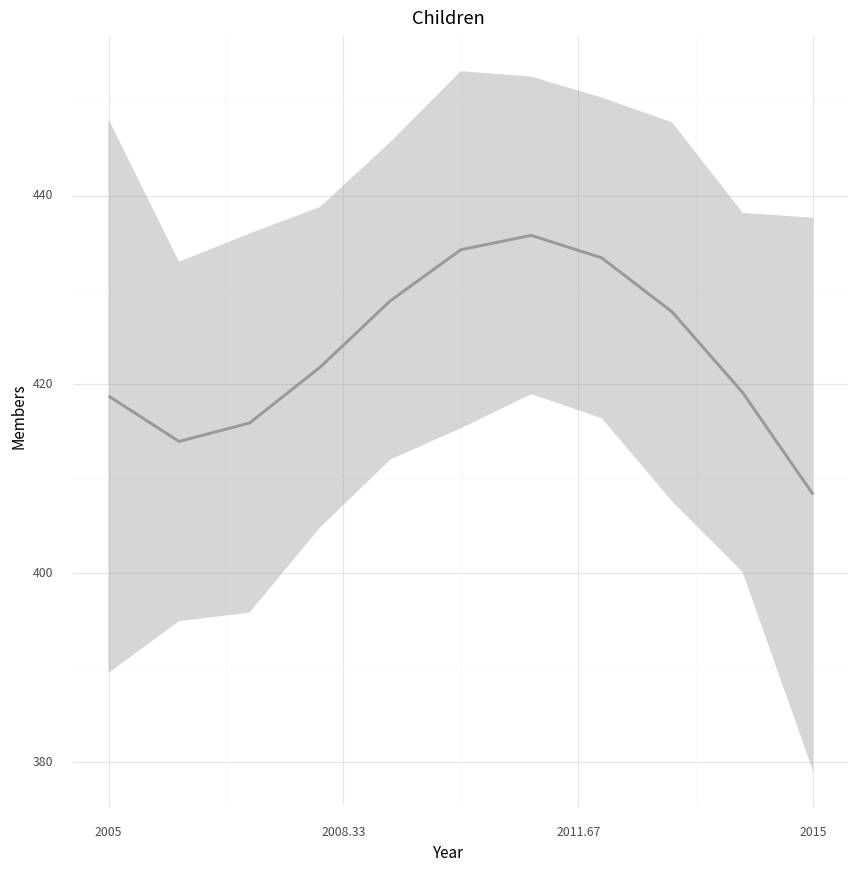

In [9]:
# Fig. A.8
def plot_section(
  section="Culture", x="Year", y="Members", data=asasec, smooth=False, **kwargs
  ):
  # Python cannot override the duplicated arguments
  for k,v in {
    'color': "#999999", 'size': 1.2, 'method': 'lm',
    'formula': 'y ~ bs(x, 3)'}.items():
    kwargs[k] = kwargs.get(k, v)
  if kwargs['method'] not in ['lm', 'ols', 'rlm', 'gls', 'glm', 'wls']:
    del kwargs['formula']
  
  p = ggplot(data.loc[lambda d: d['Sname']==section], aes(x=x, y=y))
  if smooth:
    p0 = p + geom_smooth(**kwargs
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  else:
    p0 = p + geom_line(color="#E69F00", size=1.2
    ) + scale_x_continuous(breaks = np.linspace(2005, 2015, 4)
    ) + labs(title=section)
  return p0

plot_section("Comm/Urban", smooth=True, method="loess").draw();
plot_section("Children", smooth=True, method="lm", formula='y ~ bs(x, 4)').draw();